<a href="https://colab.research.google.com/github/rafaelrlima/cat-and-dog/blob/main/treino_transf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# treino_transf.ipynb



#### Montando o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Imports utilizados

In [ ]:
import os 
import fnmatch
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import cv2

#### Separando os diretórios e carregando algumas variáveis

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/dog-and-cat'
#base_dir = './dog-and-cat/'
train_dir = os.path.join(base_dir, 'training_set/')
test_dir = os.path.join(base_dir, 'test_set')
validation_dir = os.path.join(base_dir, 'validation_set')


In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

width = 224
height = 224
dim = (width, height)

batch_size = 20
total_train = 8000
total_val = 1000
epochs = 20
NUM_CLASSES = 2


#### Obtendo as imagens do dataset para gerar as predições

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

test_generator = test_datagen.flow_from_directory( test_dir,  batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = validation_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Obtendo o modelo pré treinado

In [ ]:
#### vgg16

from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(input_shape = (224, 224, 3), 
include_top = False,
weights = 'imagenet')

for layer in model.layers:
    layer.trainable = False

x = layers.Flatten()(model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(2, activation='softmax')(x)
model = tf.keras.models.Model(model.input, x)

#### ResNet50

#from tensorflow.keras.applications import ResNet50
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
#model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")
#for layer in model.layers:
#    layer.trainable = False
#model = Sequential()
#model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
#model.add(Dense(2, activation='softmax'))


#### Compilando o Modelo

In [ ]:
#model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

#### Sumário modelo compilado

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Treinando o Modelo

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = total_train // batch_size,
          epochs=epochs,
          validation_data = validation_generator,
          validation_steps= total_val // batch_size)

Epoch 1/20
400/400 [==============================] - 112s 280ms/step - loss: 0.1765 - acc: 0.9249 - val_loss: 0.1433 - val_acc: 0.9500
Epoch 2/20
400/400 [==============================] - 112s 280ms/step - loss: 0.1813 - acc: 0.9261 - val_loss: 0.1438 - val_acc: 0.9480
Epoch 3/20
400/400 [==============================] - 111s 278ms/step - loss: 0.1729 - acc: 0.9279 - val_loss: 0.1431 - val_acc: 0.9490
Epoch 4/20
400/400 [==============================] - 110s 276ms/step - loss: 0.1800 - acc: 0.9229 - val_loss: 0.1463 - val_acc: 0.9500
Epoch 5/20
400/400 [==============================] - 111s 277ms/step - loss: 0.1785 - acc: 0.9266 - val_loss: 0.1434 - val_acc: 0.9430
Epoch 6/20
400/400 [==============================] - 111s 277ms/step - loss: 0.1762 - acc: 0.9264 - val_loss: 0.1509 - val_acc: 0.9440
Epoch 7/20
400/400 [==============================] - 111s 277ms/step - loss: 0.1718 - acc: 0.9268 - val_loss: 0.1475 - val_acc: 0.9460
Epoch 8/20
400/400 [============================

#### Salvando o Modelo

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/transf.h5')

#### Plotando evolução para verificar se ocorreu overfitting

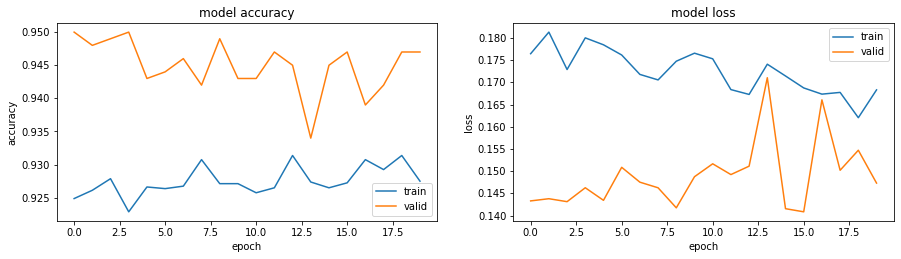

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
plt.savefig("/content/drive/MyDrive/Colab Notebooks/treino_transf.png")
plt.show()